In [16]:
import pandas as pd
from time import time
from src.MIND import MINDSmallData
from src.recommender import ContentRecommender
import numpy as np
import collections

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning) # ignore all future warnings

In [13]:
article_data = pd.read_csv('data/news_fresh.csv').drop('Unnamed: 0', axis=1)

In [14]:
user_data = pd.read_csv('data/user_data.csv').drop('Unnamed: 0', axis=1)

In [15]:
recommender = ContentRecommender(article_data['content'], article_data, user_data, LDA=True)

In [10]:
recommender.evaulate_user_by_topics()

{'NEWS': 39, 'HEALTH': 27, 'FINANCE': 19, 'LIFESTYLE': 8, 'SPORTS': 4, 'TRAVEL': 4, 'FOOD & DRINK': 2, 'TV': 2, 'ENTERTAINMENT': 1, 'CARS': 1, 'MOVIES': 1} {'NEWS': 18, 'LIFESTYLE': 1, 'SPORTS': 1}
{'SPORTS': 22, 'NEWS': 15, 'CARS': 7, 'TV': 3, 'FOOD & DRINK': 2, 'FINANCE': 1, 'LIFESTYLE': 1} {'NEWS': 13, 'SPORTS': 3, 'TV': 2, 'LIFESTYLE': 1, 'ENTERTAINMENT': 1}
{'NEWS': 78, 'TV': 15, 'SPORTS': 14, 'MUSIC': 11, 'LIFESTYLE': 9, 'FOOD & DRINK': 8, 'CARS': 4, 'TRAVEL': 4, 'FINANCE': 3, 'MOVIES': 3, 'WEATHER': 2, 'HEALTH': 2, 'ENTERTAINMENT': 1} {'NEWS': 14, 'TV': 2, 'SPORTS': 1, 'FINANCE': 1, 'MOVIES': 1, 'TRAVEL': 1}
{'FINANCE': 46, 'NEWS': 32, 'LIFESTYLE': 10, 'SPORTS': 9, 'HEALTH': 9, 'MUSIC': 4, 'FOOD & DRINK': 3, 'TV': 3, 'CARS': 1, 'ENTERTAINMENT': 1} {'NEWS': 12, 'LIFESTYLE': 4, 'CARS': 2, 'SPORTS': 1, 'HEALTH': 1}
{'SPORTS': 26, 'NEWS': 23, 'LIFESTYLE': 21, 'ENTERTAINMENT': 14, 'MOVIES': 12, 'MUSIC': 10, 'TV': 9, 'FOOD & DRINK': 4, 'FINANCE': 4, 'TRAVEL': 4, 'HEALTH': 4, 'CARS': 2

- if value less than .05, drop it
- if first value greater than 30

- create function to list out article names read by a user

- plot articles read per user distribution

- All impression ID's are unique. 32% of user id's are unique and the maximum number of impressions recorded for a single user is 62, likewise with the max number of history appearences—they're the same for a given user.

- There are 481 instances of a single impression (that being one made comprised of the same articles). The distribution of reactions is as follows: 35 clicked on the first and not the second; 446 clicked on the second and not the first. Meanwhile, noone clicked on both. So what are the two articles?
    1. Charles Rogers, former Michigan State football, Detroit Lions star, dead at 38  
    and  
    2. Porsche launches into second story of New Jersey building, killing 2 LOL  
    


In [32]:
user_data[user_data['User ID'] == 'U32146'].shape[0], user_data[(user_data['User ID'] == 'U32146') & (user_data['History'] == user_data[user_data['User ID'] == 'U32146']['History'].iloc[0])].shape[0]

# shows that history is the same for single User ID across all instances of impressions

(62, 62)

### EDA




In [5]:
topics = data['topic'].value_counts().index[:10]
distributions = data['topic'].value_counts()[:10]

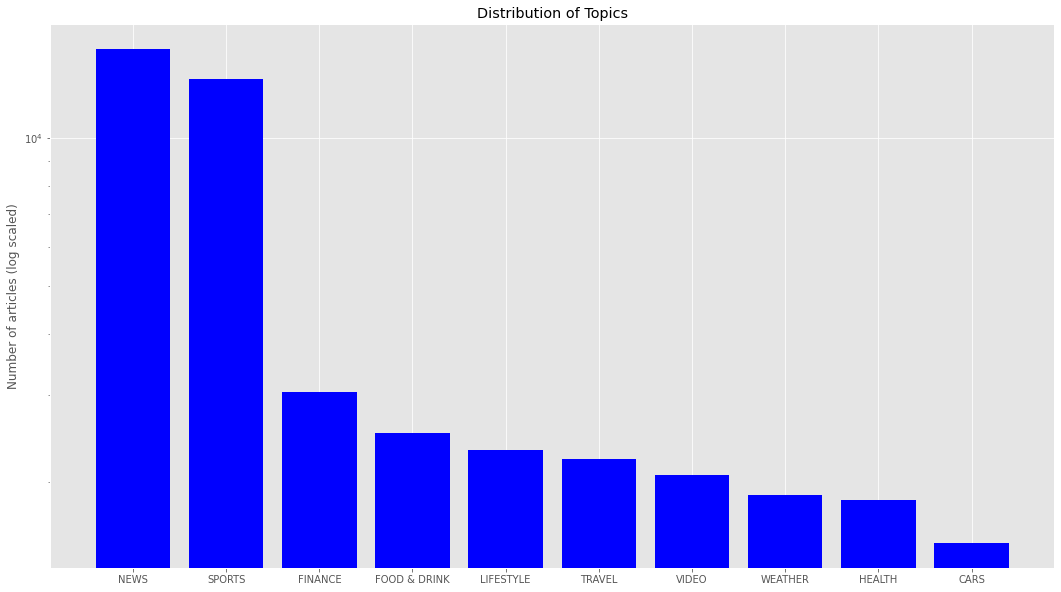

In [6]:
fig, ax = plt.subplots(figsize=(18,10))
bar_values = ['index', 'values']
ax.bar(topics, distributions, color='b')
ax.set_title('Distribution of Topics')
ax.set_ylabel('Number of articles (log scaled)')
plt.yscale('log');

In [7]:
topics = data['subtopic'].value_counts().index[:10]
distributions = data['subtopic'].value_counts()[:10]

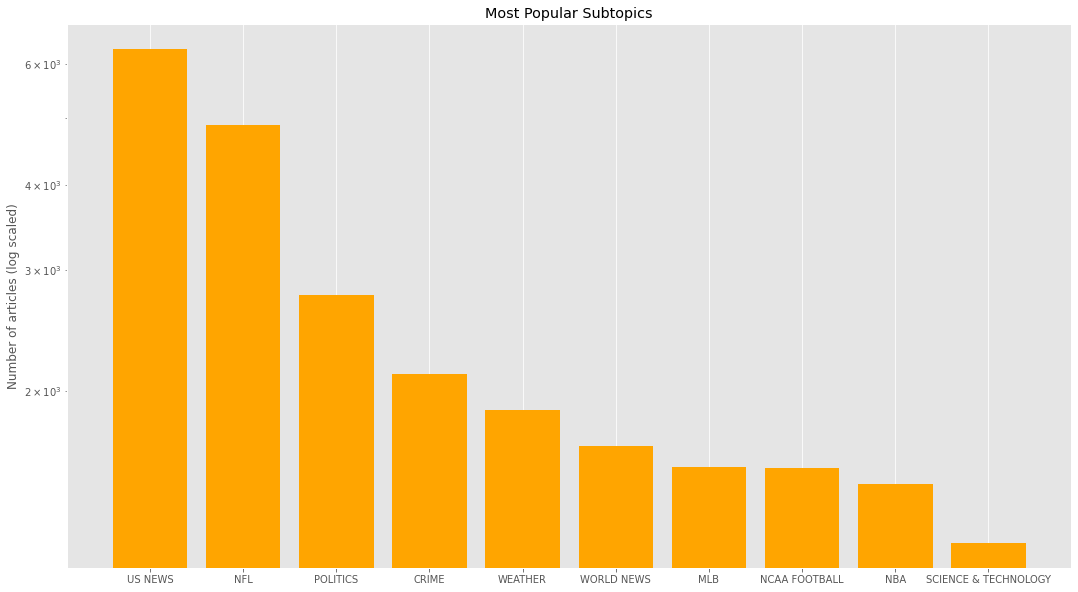

In [8]:
fig, ax = plt.subplots(figsize=(18,10))
bar_values = ['index', 'values']
ax.bar(topics, distributions, color='orange')
ax.set_title('Most Popular Subtopics')
ax.set_ylabel('Number of articles (log scaled)')
plt.yscale('log');

### Topic Modeling

In [9]:
docs = data['content']

In [10]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=20,
                                   stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(docs)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

trying to show that TFIDF is a poor route for demonstrating similarity

In [206]:
d = {}
for i in range(0, 110, 10):
    d[i] = 0

for i in range(tfidf.shape[0]):
    gt_0 = np.sum(tfidf[i].toarray() > 0)
    for k in d.keys():
        if gt_0 > 100:
            d[100] += 1
        elif gt_0 == 0:
            d[0] += 1
        else:    
            if gt_0 <= k and gt_0 > k-10:
                d[k] += 1

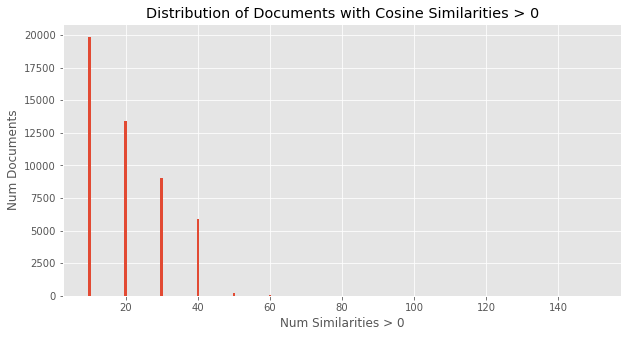

In [189]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(d.keys(),d.values())
ax.set_title('Distribution of Documents with Cosine Similarities > 0')
ax.set_ylabel('Num Documents')
ax.set_xlabel('Num Similarities > 0');